In [2]:
import pandas as pd

# Load the data from the Data folder
df = pd.read_csv('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Show the first 5 rows
print("Data loaded successfully!")
display(df.head())

# Show column info
df.info()

Data loaded successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [3]:
# 1. Remove Duplicates (if any exist)
print(f"Duplicates before: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicates after: {df.duplicated().sum()}")

# 2. Standardize Text Values
# Many columns have "No internet service" or "No phone service".
# Let's replace those with a simple "No" to make things consistent.

replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No'})

df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

# 3. Check for any other weird values
# This loop prints all unique values in text columns so you can spot errors
print("\n--- Unique Values in Each Column ---")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

Duplicates before: 0
Duplicates after: 0

--- Unique Values in Each Column ---


In [4]:
# 1. Convert 'TotalCharges' to numeric
# 'coerce' means: if you find a text like " ", turn it into NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Check for missing values (NaN)
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# 3. Fill missing values
# Since only a few rows are missing (usually 11 rows), we can fill them with 0 or the median.
# Let's fill with 0 (assuming they are new customers who haven't paid yet)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# 4. Drop 'customerID' column
# This column is unique for every person and doesn't help predict churn.
df.drop(columns=['customerID'], inplace=True)

# 5. Final check
print("\nData types after cleaning:")
print(df.info())

Missing values in TotalCharges: 11

Data types after cleaning:
<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   str    
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   str    
 3   Dependents        7043 non-null   str    
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   str    
 6   MultipleLines     7043 non-null   str    
 7   InternetService   7043 non-null   str    
 8   OnlineSecurity    7043 non-null   str    
 9   OnlineBackup      7043 non-null   str    
 10  DeviceProtection  7043 non-null   str    
 11  TechSupport       7043 non-null   str    
 12  StreamingTV       7043 non-null   str    
 13  StreamingMovies   7043 non-null   str    
 14  Contract          7043 non-null   str    
 15  PaperlessBilling  7043 non-null   str

Total Duplicate Rows: 22

--- Missing Values per Column ---
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


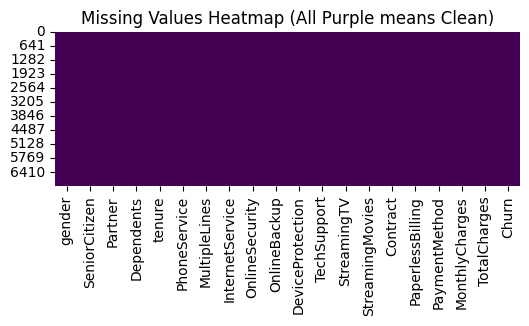

In [6]:
# 1. Check for Duplicates
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

# 2. Check for Missing Values (Nulls) in every column
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())

# 3. Visual Check (Optional Pro Tip)
# If you want to SEE the missing values, use a heatmap.
# Yellow lines would indicate missing data.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,2))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap (All Purple means Clean)")
plt.show()

C:\Users\Kalathoti Rishitha\AppData\Local\Temp\ipykernel_18412\413163495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


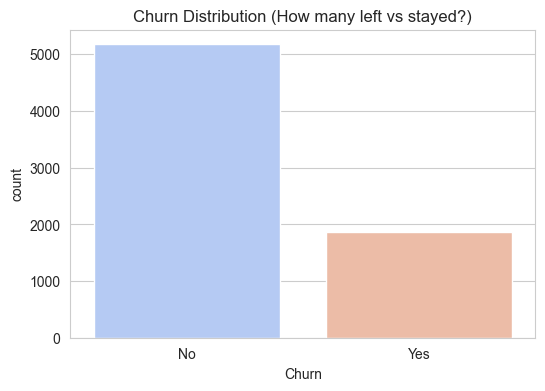

Churn
No     5174
Yes    1869
Name: count, dtype: int64


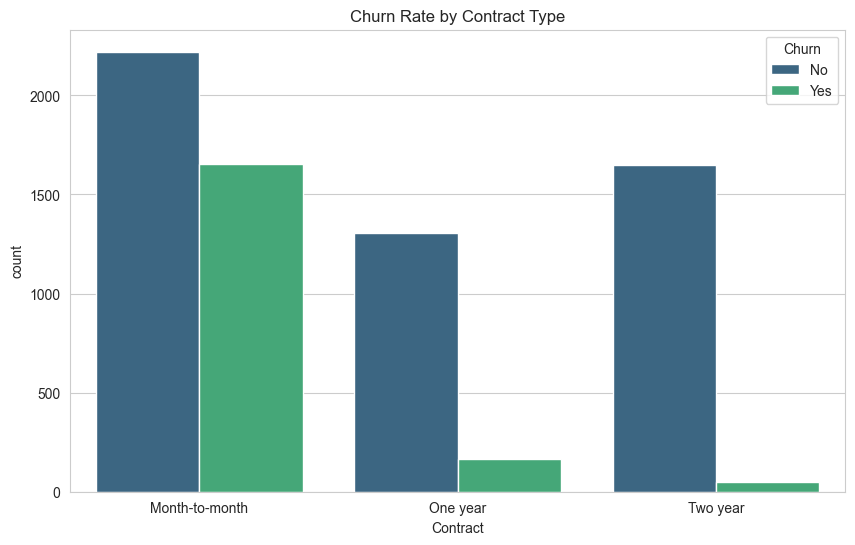

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_style('whitegrid')

# 1. Plot the distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution (How many left vs stayed?)')
plt.show()

# Print the exact numbers
print(df['Churn'].value_counts())
# 2. Churn by Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn Rate by Contract Type')
plt.show()

print(df['Contract'].value_counts())

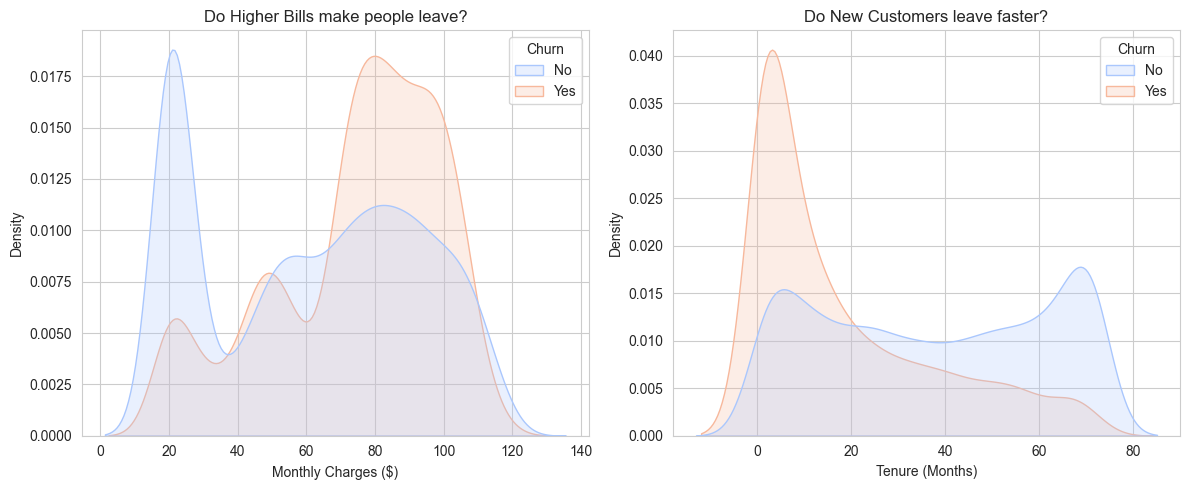

In [11]:
plt.figure(figsize=(12, 5))

# Chart 1: Monthly Charges vs. Churn
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette='coolwarm')
plt.title('Do Higher Bills make people leave?')
plt.xlabel('Monthly Charges ($)')

# Chart 2: Tenure vs. Churn
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, palette='coolwarm')
plt.title('Do New Customers leave faster?')
plt.xlabel('Tenure (Months)')

plt.tight_layout()
plt.show()

In [12]:
# 1. Manually encode the Target variable 'Churn'
# We want 'Yes' to be 1 and 'No' to be 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. Convert all other categorical columns to numbers automatically
# pd.get_dummies creates new columns (switches) for every category.
# drop_first=True avoids redundancy (e.g., if you have 'Male', you don't need 'Female')
df_final = pd.get_dummies(df, drop_first=True)

# 3. Scale the Numerical Columns (0 to 1 range)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_final[cols_to_scale] = scaler.fit_transform(df_final[cols_to_scale])

# Show the new "Math-only" table
print("Data successfully translated to numbers!")
display(df_final.head())

Data successfully translated to numbers!


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.115423,0.003437,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.472222,0.385075,0.217564,0,True,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
2,0,0.027778,0.354229,0.012453,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.625000,0.239303,0.211951,0,True,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,0,0.027778,0.521891,0.017462,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Separate Features (X) and Target (y)
X = df_final.drop('Churn', axis=1)  # All columns except Churn
y = df_final['Churn']               # Only the Churn column

# 2. Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make Predictions on the Test Data
y_pred = model.predict(X_test)

# 5. Check Accuracy
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Model Accuracy: 0.82


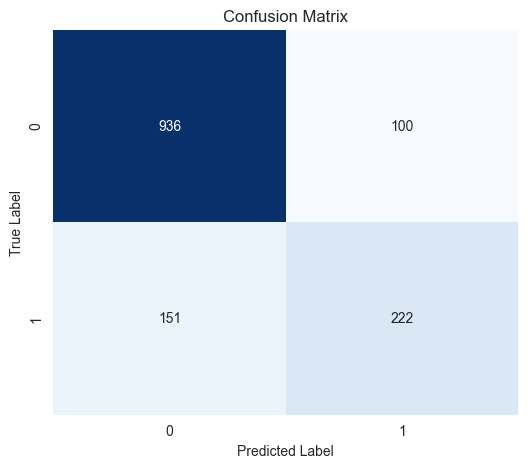

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print detailed report
print(classification_report(y_test, y_pred))

In [18]:
# 1. Create a variable for the FULL dataset (inputs only, no target)
X_full = df_final.drop('Churn', axis=1)

# 2. Generate predictions for the WHOLE dataset
# This ensures we have 7043 predictions for 7043 rows
full_predictions = model.predict(X_full)
full_probs = model.predict_proba(X_full)[:, 1]

# 3. Add these back to the original readable dataframe
df['Predicted_Churn'] = full_predictions
df['Risk_Score'] = full_probs

# 4. Export to CSV
# We save this file in the PowerBI folder you created earlier
df.to_csv('../PowerBI/churn_predictions.csv', index=False)

print("Export Complete! Check your 'PowerBI' folder for 'churn_predictions.csv'.")

Export Complete! Check your 'PowerBI' folder for 'churn_predictions.csv'.
